In [4]:
caminho_saida_parquet = r'D:\DOUTORADO\DOUTORADO_NOTEBOOK_JPY/df_DocFinal2025.parquet'
df = pd.read_parquet(caminho_saida_parquet)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5112 entries, 2020-07-17 00:00:00 to 2020-09-25 23:40:00
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ph             5112 non-null   float64
 1   od             5112 non-null   float64
 2   ta             5112 non-null   float64
 3   te             5112 non-null   float64
 4   um             5112 non-null   float64
 5   orp            5112 non-null   float64
 6   ec             5112 non-null   float64
 7   tds            5112 non-null   float64
 8   hora           5112 non-null   int64  
 9   radiacao       5112 non-null   float64
 10  chuva          5112 non-null   float64
 11  vel_vento      5112 non-null   float64
 12  dir_vento      5112 non-null   float64
 13  umid_ins       5112 non-null   float64
 14  pressao_ins    5112 non-null   float64
 15  pto_orval_ins  5112 non-null   float64
 16  temp_ins       5112 non-null   float64
 17  hora_seno      5

Gráfico salvo com sucesso em: D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria\images\fig01_ph_full_timeseries.png


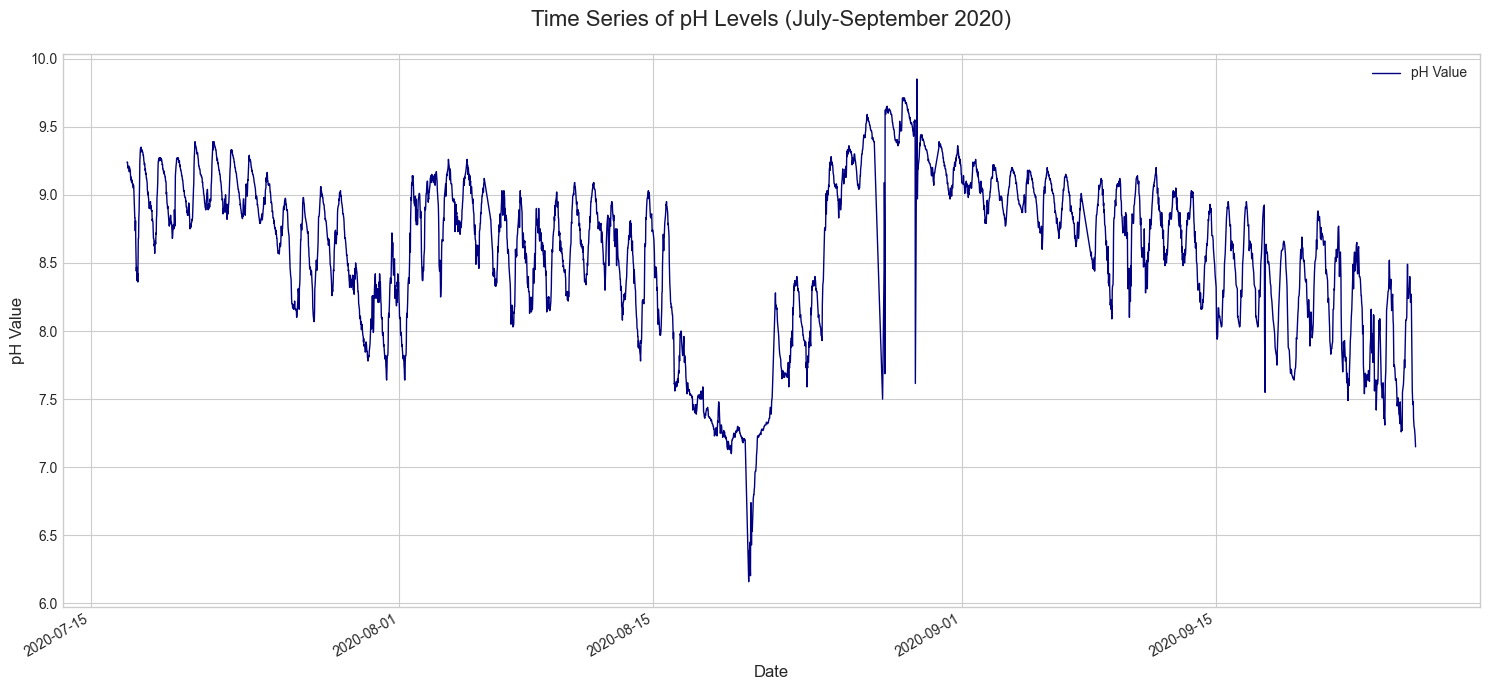

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pathlib import Path

# --- Assumindo que o DataFrame 'df' já foi carregado ---

# --- Configuração de Caminhos (Nova Diretriz) ---
# Define o caminho base para os resultados do notebook de EDA
# O 'r' antes da string é importante para que o Python leia o caminho do Windows corretamente
base_path = Path(r'D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria')
output_dir = base_path / 'images'

# Cria o diretório de imagens, se ele não existir
output_dir.mkdir(parents=True, exist_ok=True)

# Nome de arquivo sugestivo para publicação
figure_name = 'fig01_ph_full_timeseries.png'
output_path = output_dir / figure_name

# --- Criação do Gráfico de Linha da Variável Alvo ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(df.index, df['ph'], label='pH Value', color='navy', linewidth=1)

# --- Formatação para Padrão de Publicação ---
ax.set_title('Time Series of pH Levels (July-September 2020)', fontsize=16, pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('pH Value', fontsize=12)
ax.legend(loc='upper right')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=8, maxticks=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=30, ha='right')

# --- Salvando a Figura ---
plt.tight_layout()
plt.savefig(output_path, dpi=300)

print(f"Gráfico salvo com sucesso em: {output_path}")
plt.show()

<Axes: title={'center': 'Hourly pH Distribution (Diurnal Seasonality)'}, xlabel='Hour of the Day', ylabel='pH Value Distribution'>

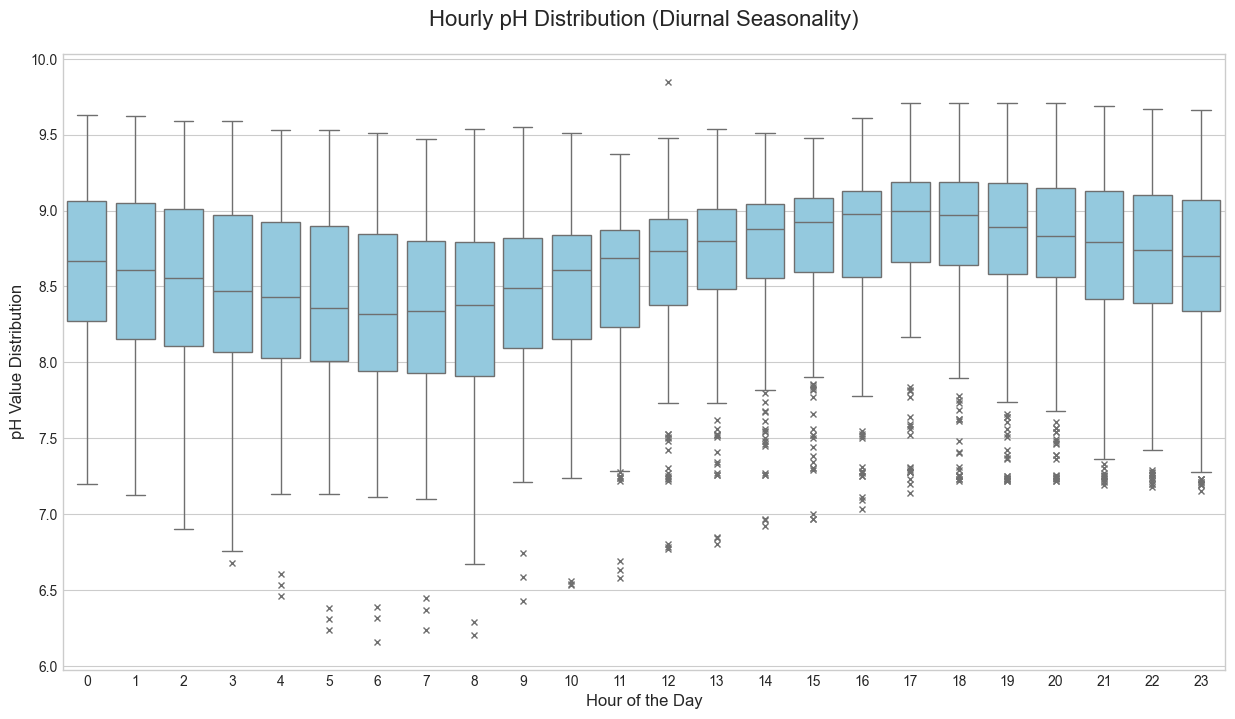

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

# --- Assumindo que o DataFrame 'df' já foi carregado ---

# --- Configuração de Caminhos ---
base_path = Path(r'D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria')
output_dir = base_path / 'images'
output_dir.mkdir(parents=True, exist_ok=True) # Garante que o diretório exista
figure_name = 'fig02_ph_hourly_boxplot.png'
output_path = output_dir / figure_name

# --- Criação do Gráfico Box Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))

# Usar Seaborn para criar o box plot.
# O índice do df é um DatetimeIndex, então podemos acessar a hora diretamente com df.index.hour
sns.boxplot(x=df.index.hour, y=df['ph'], ax=ax, color='skyblue', 
            flierprops={"marker": "x", "markersize": 4, "markerfacecolor": "gray"})

# --- Formatação para Padrão de Publicação ---
ax.set_title('Hourly pH Distribution (Diurnal Seasonality)', fontsize=16, pad=20)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('pH Value Distribution', fontsize=12)
ax

In [8]:
import pandas as pd

# --- Assumindo que o DataFrame 'df' já foi carregado ---

# Agrupa os dados pela hora do dia e calcula as estatísticas descritivas para a coluna 'ph'
hourly_stats = df.groupby(df.index.hour)['ph'].describe()

# Imprime a tabela de estatísticas
print("Estatísticas Descritivas do pH por Hora do Dia:")
print(hourly_stats)

# Opcional: Salvar esta tabela em um arquivo CSV para o artigo
# output_path_table = '../figures/table01_hourly_ph_statistics.csv'
# hourly_stats.to_csv(output_path_table)
# print(f"\nTabela de estatísticas salva em: {output_path_table}")

Estatísticas Descritivas do pH por Hora do Dia:
    count      mean       std       min    25%    50%       75%   max
0   213.0  8.605868  0.569908  7.200000  8.270  8.670  9.060000  9.63
1   213.0  8.553144  0.586201  7.125714  8.150  8.610  9.050000  9.62
2   213.0  8.504567  0.599782  6.902857  8.110  8.555  9.010000  9.59
3   213.0  8.450428  0.606513  6.680000  8.070  8.470  8.970000  9.59
4   213.0  8.391819  0.614720  6.457143  8.030  8.430  8.925000  9.53
5   213.0  8.345744  0.609827  6.234286  8.010  8.360  8.900000  9.53
6   213.0  8.305560  0.606603  6.160000  7.940  8.315  8.845000  9.51
7   213.0  8.300529  0.585685  6.234000  7.930  8.335  8.800000  9.47
8   213.0  8.347670  0.569476  6.204000  7.910  8.380  8.790000  9.54
9   213.0  8.425352  0.553967  6.430000  8.095  8.490  8.820000  9.55
10  213.0  8.465547  0.534960  6.530000  8.150  8.610  8.840000  9.51
11  213.0  8.518340  0.519273  6.580000  8.235  8.690  8.870000  9.37
12  213.0  8.595655  0.520375  6.770000  8

Gráficos de ACF e PACF salvos com sucesso em: D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria\images\fig03_ph_acf_pacf.png


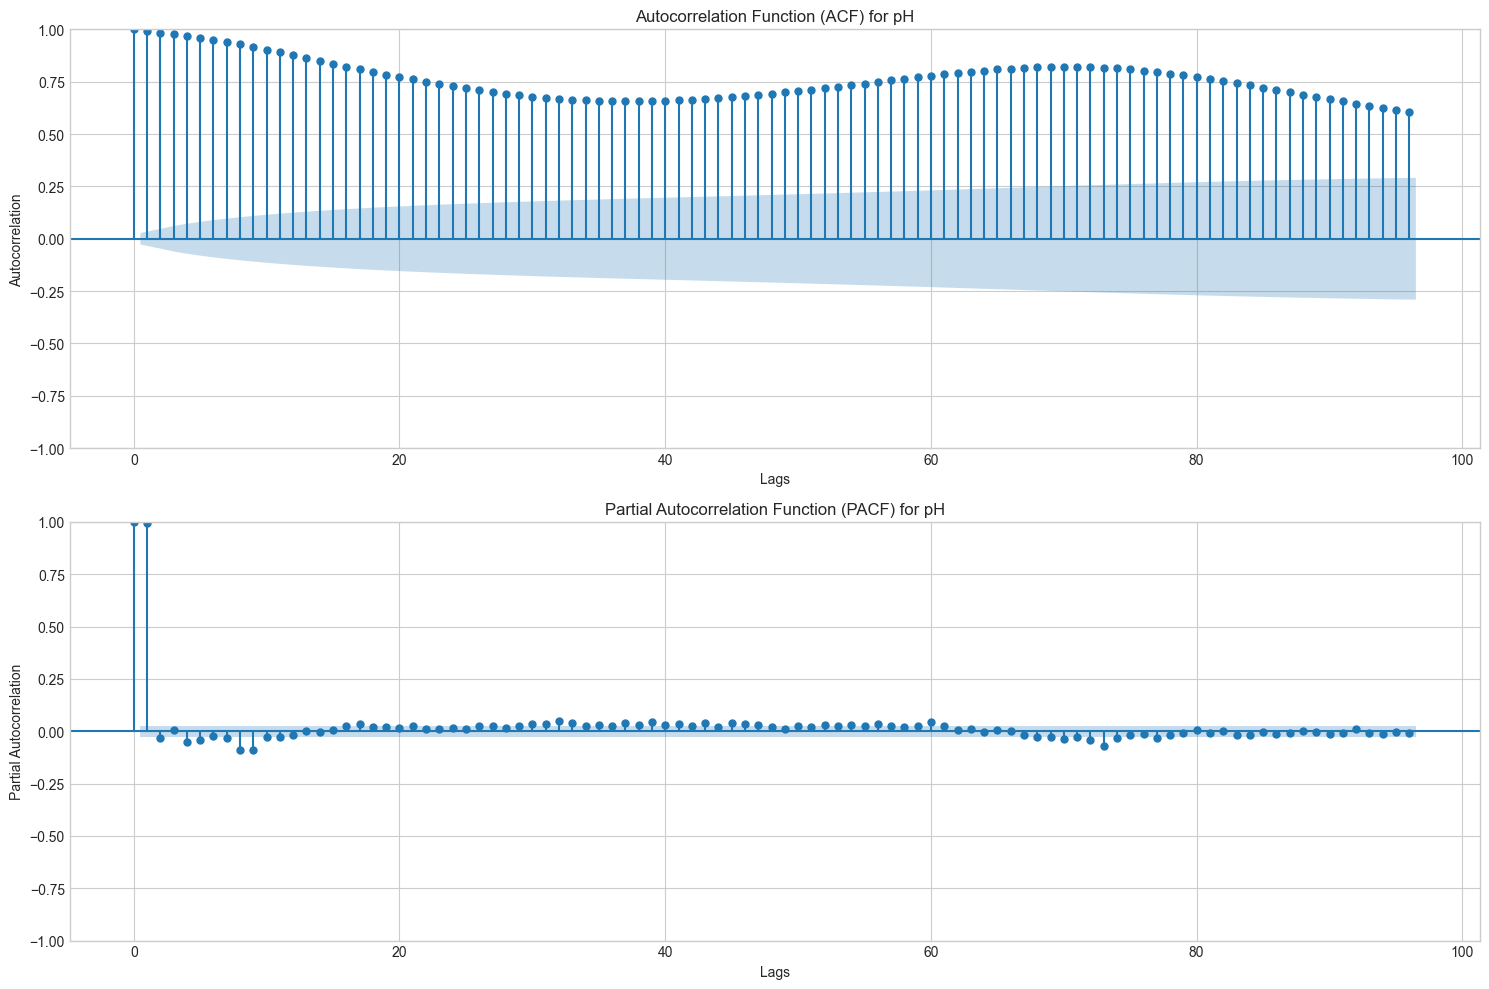

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- Assumindo que o DataFrame 'df' já foi carregado ---

# --- Configuração de Caminhos ---
base_path = Path(r'D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria')
output_dir = base_path / 'images'
output_dir.mkdir(parents=True, exist_ok=True)
figure_name = 'fig03_ph_acf_pacf.png'
output_path = output_dir / figure_name

# --- Criação dos Gráficos ACF e PACF ---
plt.style.use('seaborn-v0_8-whitegrid')
# Criamos uma figura com dois subplots, um acima do outro
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plotar o ACF
# lags=96 -> Queremos ver as correlações de até 96 lags (96 * 20 min = 32 horas)
plot_acf(df['ph'].dropna(), lags=96, ax=ax1, title='Autocorrelation Function (ACF) for pH')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Autocorrelation')

# Plotar o PACF
plot_pacf(df['ph'].dropna(), lags=96, ax=ax2, title='Partial Autocorrelation Function (PACF) for pH')
ax2.set_xlabel('Lags')
ax2.set_ylabel('Partial Autocorrelation')

# --- Salvando a Figura ---
plt.tight_layout()
plt.savefig(output_path, dpi=300)

print(f"Gráficos de ACF e PACF salvos com sucesso em: {output_path}")
plt.show()

In [17]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- Assumindo que o DataFrame 'df' já foi carregado ---

# --- 1. Cálculo Numérico do ACF e PACF ---
# nlags especifica quantos lags queremos calcular
nlags = 40 
acf_values = acf(df['ph'].dropna(), nlags=nlags)
pacf_values = pacf(df['ph'].dropna(), nlags=nlags)

print("--- Valores Numéricos da Autocorrelação ---")
print("Lag |    ACF    |    PACF   ")
print("---------------------------------")
for i in range(1, nlags + 1):
    print(f"{i:^3} | {acf_values[i]:^9.4f} | {pacf_values[i]:^9.4f}")

# --- 2. Teste Estatístico de Ljung-Box ---
# Realizamos o teste para um conjunto de lags (ex: os 10 primeiros)
ljung_box_result = acorr_ljungbox(df['ph'].dropna(), lags=[40], return_df=True)

print("\n--- Teste de Ljung-Box ---")
print(ljung_box_result)

# Interpretação do p-valor
p_value = ljung_box_result.iloc[0]['lb_pvalue']
if p_value < 0.05:
    print(f"\nConclusão: Com um p-valor de {p_value:.4f}, rejeitamos a hipótese nula.")
    print("As autocorrelações são estatisticamente significativas. A série possui 'memória'.")
else:
    print(f"\nConclusão: Com um p-valor de {p_value:.4f}, não podemos rejeitar a hipótese nula.")
    print("Não há evidência de autocorrelação significativa na série.")

--- Valores Numéricos da Autocorrelação ---
Lag |    ACF    |    PACF   
---------------------------------
 1  |  0.9925   |  0.9927  
 2  |  0.9846   |  -0.0336 
 3  |  0.9767   |  0.0060  
 4  |  0.9683   |  -0.0511 
 5  |  0.9592   |  -0.0442 
 6  |  0.9498   |  -0.0211 
 7  |  0.9400   |  -0.0333 
 8  |  0.9289   |  -0.0930 
 9  |  0.9164   |  -0.0903 
10  |  0.9036   |  -0.0259 
11  |  0.8905   |  -0.0260 
12  |  0.8769   |  -0.0173 
13  |  0.8634   |  0.0002  
14  |  0.8498   |  -0.0028 
15  |  0.8361   |  0.0076  
16  |  0.8227   |  0.0251  
17  |  0.8097   |  0.0337  
18  |  0.7970   |  0.0223  
19  |  0.7845   |  0.0187  
20  |  0.7724   |  0.0143  
21  |  0.7608   |  0.0239  
22  |  0.7495   |  0.0134  
23  |  0.7386   |  0.0130  
24  |  0.7283   |  0.0151  
25  |  0.7184   |  0.0115  
26  |  0.7093   |  0.0258  
27  |  0.7007   |  0.0250  
28  |  0.6927   |  0.0135  
29  |  0.6854   |  0.0258  
30  |  0.6789   |  0.0333  
31  |  0.6731   |  0.0368  
32  |  0.6684   |  0.0481

--- Teste de Ljung-Box para o Random Walk ---
        lb_stat      lb_pvalue
10  1342.378617  2.728651e-282

Conclusão (Random Walk): Com p-valor de 0.0000, rejeitamos a hipótese nula.
O teste detectou autocorrelação significativa, confirmando que a série NÃO é aleatória.


--- Teste de Ljung-Box para o Ruído Branco ---
     lb_stat  lb_pvalue
10  4.864987   0.900013

Conclusão (Ruído Branco): Com p-valor de 0.9000, não rejeitamos a hipótese nula.
O teste NÃO detectou autocorrelação significativa, confirmando que a série É aleatória.


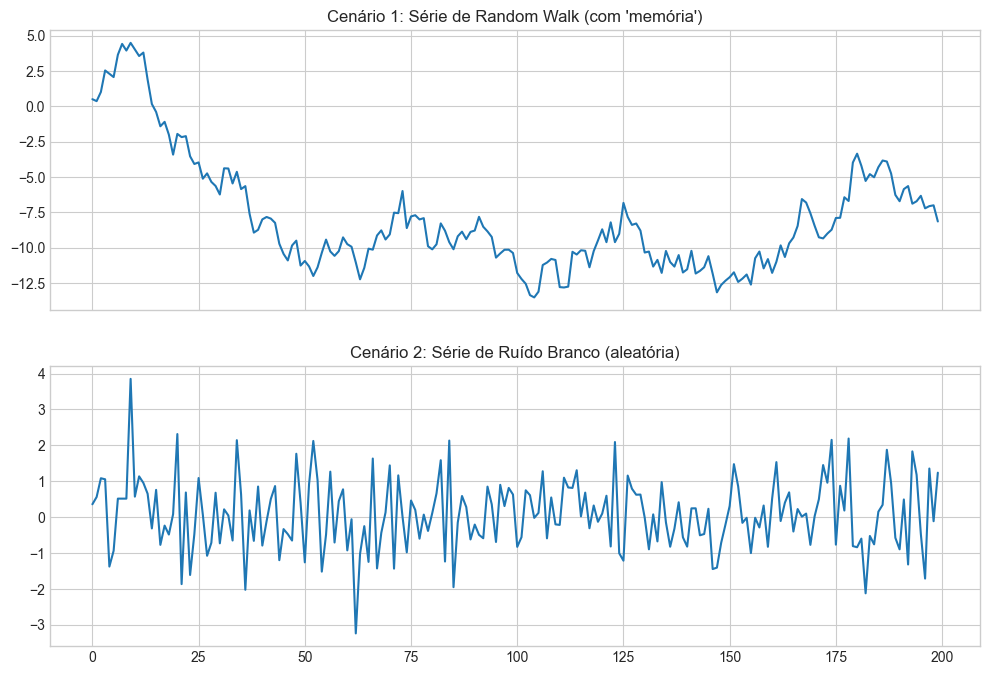

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- Configuração ---
# Usamos uma semente para que nossos resultados aleatórios sejam sempre os mesmos
np.random.seed(42)
n_samples = 200

# --- Cenário 1: Gerar um Random Walk ---
# Começa com passos aleatórios (positivos ou negativos)
random_steps = np.random.randn(n_samples)
# O Random Walk é a soma cumulativa dos passos
random_walk = np.cumsum(random_steps)
random_walk_series = pd.Series(random_walk)

# --- Cenário 2: Gerar Ruído Branco ---
white_noise_series = pd.Series(np.random.randn(n_samples))

# --- Executar o Teste de Ljung-Box em ambos os cenários ---
print("--- Teste de Ljung-Box para o Random Walk ---")
rw_test_result = acorr_ljungbox(random_walk_series, lags=[10], return_df=True)
print(rw_test_result)
rw_p_value = rw_test_result.iloc[0]['lb_pvalue']

if rw_p_value < 0.05:
    print(f"\nConclusão (Random Walk): Com p-valor de {rw_p_value:.4f}, rejeitamos a hipótese nula.")
    print("O teste detectou autocorrelação significativa, confirmando que a série NÃO é aleatória.")
else:
    print(f"\nConclusão (Random Walk): Com p-valor de {rw_p_value:.4f}, não rejeitamos a hipótese nula.")
    print("O teste NÃO detectou autocorrelação significativa.")

print("\n" + "="*50 + "\n")

print("--- Teste de Ljung-Box para o Ruído Branco ---")
wn_test_result = acorr_ljungbox(white_noise_series, lags=[10], return_df=True)
print(wn_test_result)
wn_p_value = wn_test_result.iloc[0]['lb_pvalue']

if wn_p_value < 0.05:
    print(f"\nConclusão (Ruído Branco): Com p-valor de {wn_p_value:.4f}, rejeitamos a hipótese nula.")
    print("O teste detectou autocorrelação significativa.")
else:
    print(f"\nConclusão (Ruído Branco): Com p-valor de {wn_p_value:.4f}, não rejeitamos a hipótese nula.")
    print("O teste NÃO detectou autocorrelação significativa, confirmando que a série É aleatória.")

# --- Visualização para comparação ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax1.plot(random_walk_series)
ax1.set_title("Cenário 1: Série de Random Walk (com 'memória')")
ax2.plot(white_noise_series)
ax2.set_title("Cenário 2: Série de Ruído Branco (aleatória)")
plt.show()

Gráficos de ACF e PACF salvos com sucesso em: D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria\images\fig03_ph_acf_pacf.png


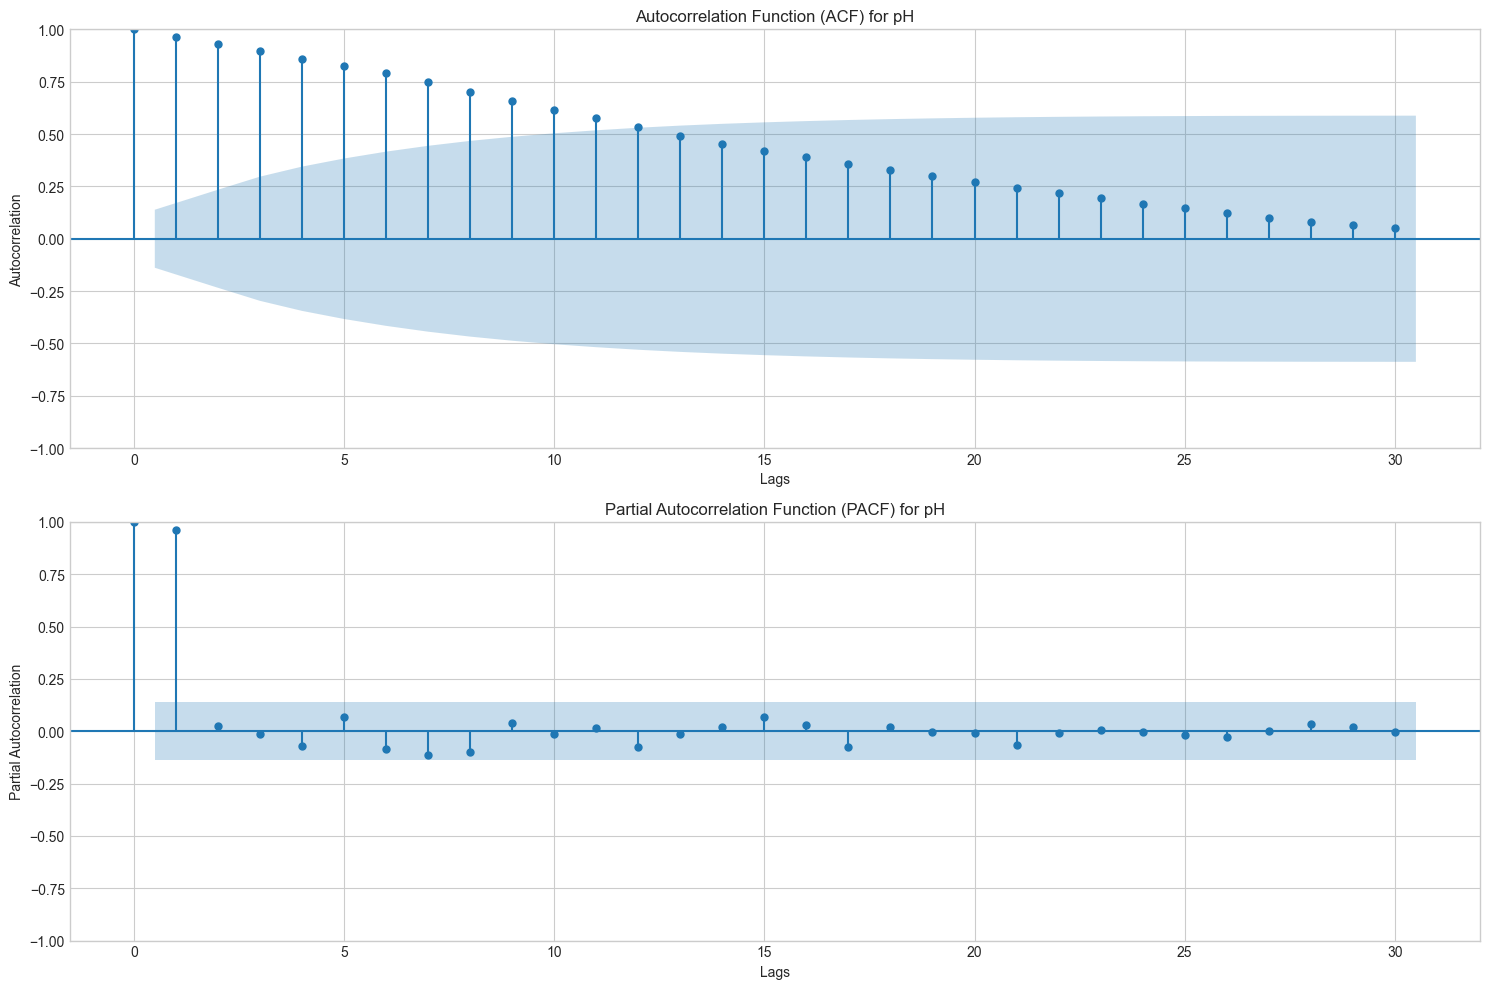

In [23]:
plt.style.use('seaborn-v0_8-whitegrid')
# Criamos uma figura com dois subplots, um acima do outro
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
# Plotar o ACF
# lags=96 -> Queremos ver as correlações de até 96 lags (96 * 20 min = 32 horas)
plot_acf(random_walk_series, lags=30, ax=ax1, title='Autocorrelation Function (ACF) for pH')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Autocorrelation')

# Plotar o PACF
plot_pacf(random_walk_series, lags=30, ax=ax2, title='Partial Autocorrelation Function (PACF) for pH')
ax2.set_xlabel('Lags')
ax2.set_ylabel('Partial Autocorrelation')

# --- Salvando a Figura ---
plt.tight_layout()
print(f"Gráficos de ACF e PACF salvos com sucesso em: {output_path}")
plt.show()

Gráficos de ACF e PACF salvos com sucesso em: D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria\images\fig03_ph_acf_pacf.png


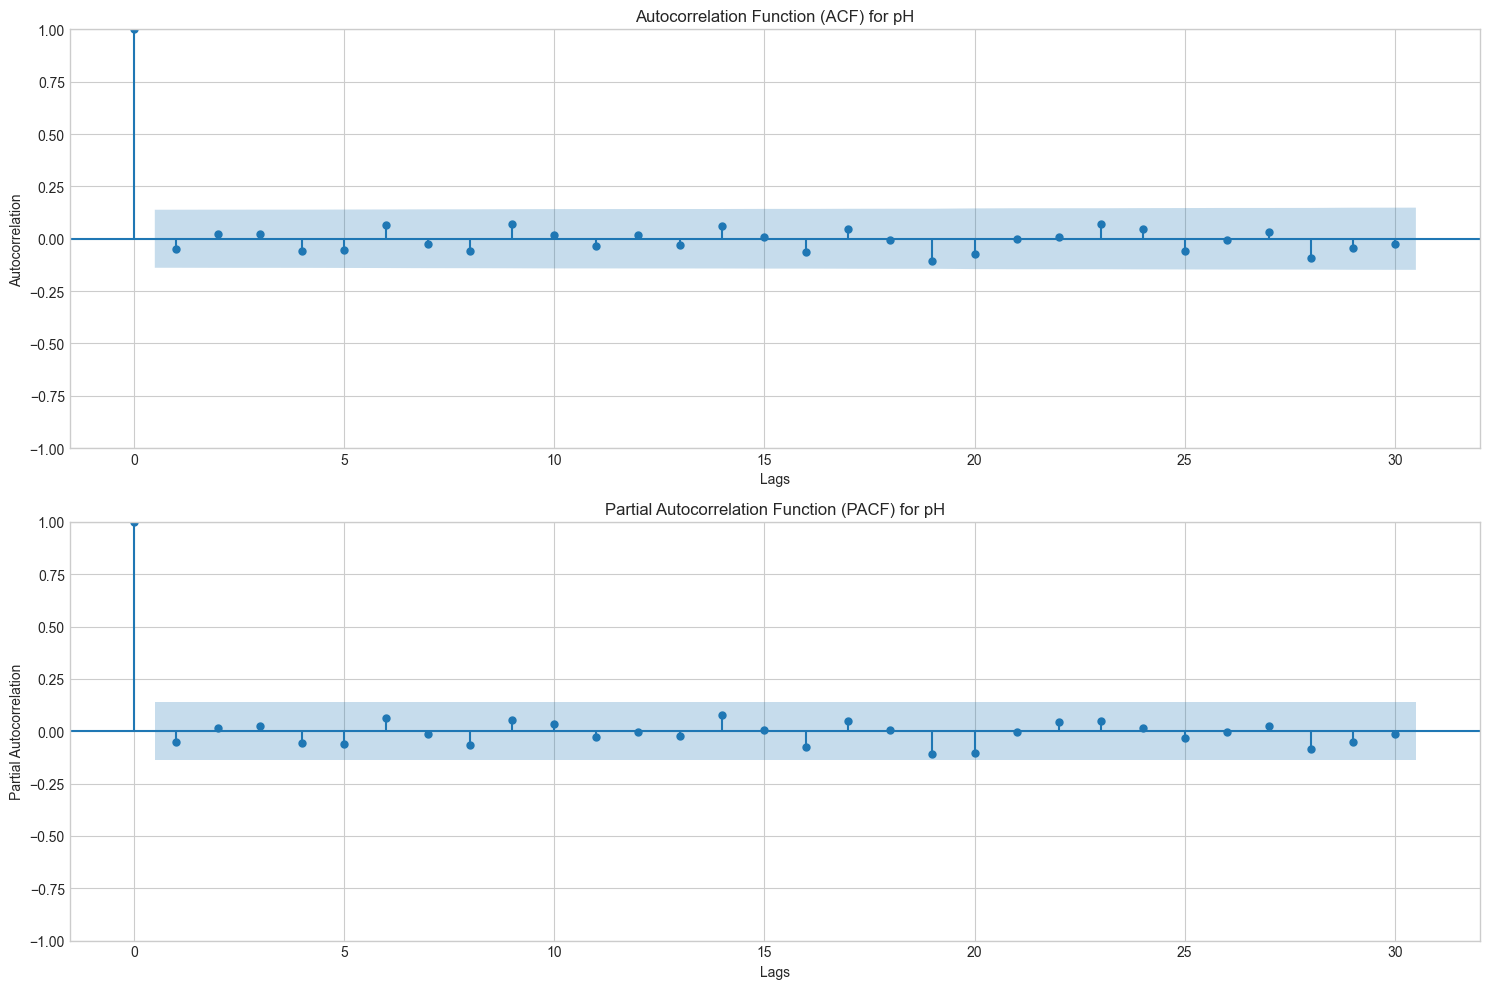

In [24]:
plt.style.use('seaborn-v0_8-whitegrid')
# Criamos uma figura com dois subplots, um acima do outro
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
# Plotar o ACF
# lags=96 -> Queremos ver as correlações de até 96 lags (96 * 20 min = 32 horas)
plot_acf(white_noise_series, lags=30, ax=ax1, title='Autocorrelation Function (ACF) for pH')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Autocorrelation')

# Plotar o PACF
plot_pacf(white_noise_series, lags=30, ax=ax2, title='Partial Autocorrelation Function (PACF) for pH')
ax2.set_xlabel('Lags')
ax2.set_ylabel('Partial Autocorrelation')

# --- Salvando a Figura ---
plt.tight_layout()
print(f"Gráficos de ACF e PACF salvos com sucesso em: {output_path}")
plt.show()

Gráfico comparativo de ACF/PACF salvo com sucesso em: D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria\images\fig04_acf_pacf_comparison.png


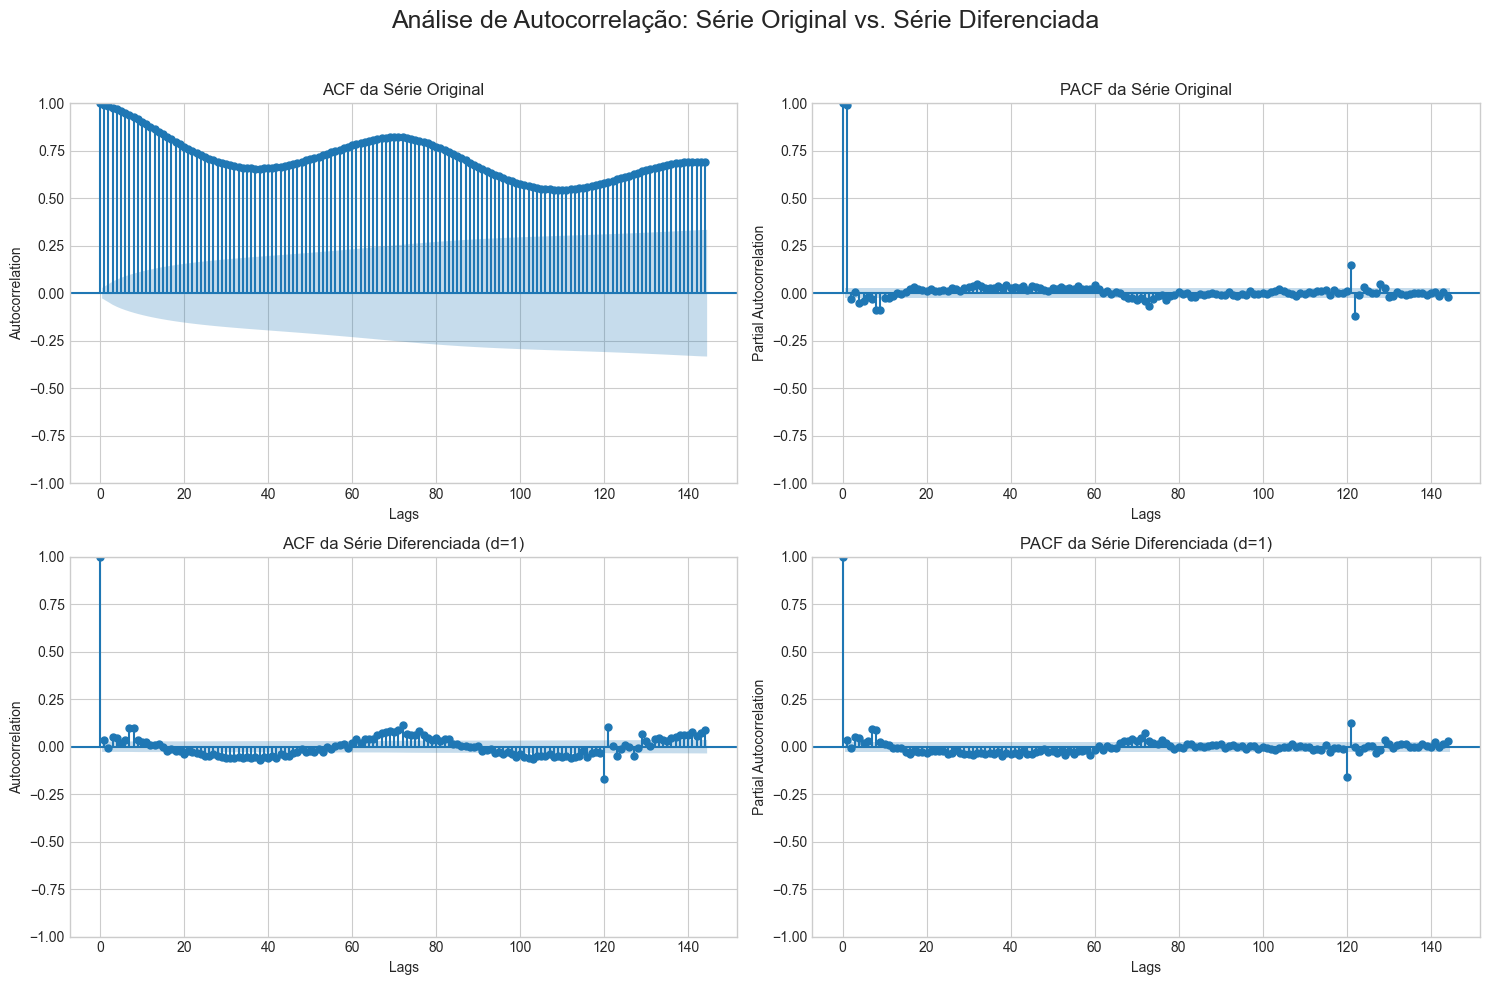

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- Assumindo que o DataFrame 'df' já foi carregado ---

# --- Configuração de Caminhos ---
base_path = Path(r'D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria')
output_dir = base_path / 'images'
output_dir.mkdir(parents=True, exist_ok=True)
figure_name = 'fig04_acf_pacf_comparison.png'
output_path = output_dir / figure_name

# --- 1. Criar a Série Diferenciada ---
# O .dropna() é importante para remover o primeiro valor que será NaN após a diferenciação
df_diff = df['ph'].diff().dropna()

# --- 2. Criação dos Gráficos Comparativos ---
plt.style.use('seaborn-v0_8-whitegrid')
# Criamos uma figura com 2 linhas e 2 colunas de subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# --- Gráficos para a Série Original ---
plot_acf(df['ph'], lags=144, ax=axes[0, 0], title='ACF da Série Original')
axes[0, 0].set_xlabel('Lags')
axes[0, 0].set_ylabel('Autocorrelation')

plot_pacf(df['ph'], lags=144, ax=axes[0, 1], title='PACF da Série Original')
axes[0, 1].set_xlabel('Lags')
axes[0, 1].set_ylabel('Partial Autocorrelation')

# --- Gráficos para a Série Diferenciada ---
plot_acf(df_diff, lags=144, ax=axes[1, 0], title='ACF da Série Diferenciada (d=1)')
axes[1, 0].set_xlabel('Lags')
axes[1, 0].set_ylabel('Autocorrelation')

plot_pacf(df_diff, lags=144, ax=axes[1, 1], title='PACF da Série Diferenciada (d=1)')
axes[1, 1].set_xlabel('Lags')
axes[1, 1].set_ylabel('Partial Autocorrelation')


# --- Salvando a Figura ---
fig.suptitle('Análise de Autocorrelação: Série Original vs. Série Diferenciada', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta o layout para o título principal
plt.savefig(output_path, dpi=300)

print(f"Gráfico comparativo de ACF/PACF salvo com sucesso em: {output_path}")
plt.show()

<Axes: >

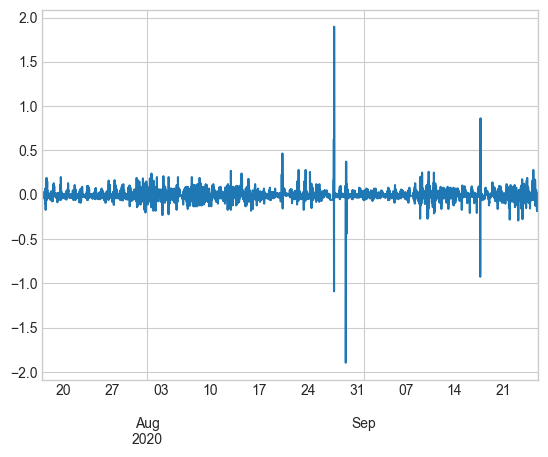

In [32]:
df_diff.plot()

In [26]:
# << RODE ESTE CÓDIGO PARA O AJUSTE FINAL COM VARIÁVEIS DE GRANGER >>

from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# --- PREPARAÇÃO DOS DADOS ---
# Assumindo que seu DataFrame 'df' está carregado e preparado
model_df = df.copy()
endog = model_df['ph']

# --- Lista Final de Variáveis Exógenas (Baseada na Causalidade de Granger) ---
exog_vars_final = [ 'radiacao','orp','od','te','ta','tds']
exog = model_df[exog_vars_final]

# Divisão em treino e teste
test_size = 7 * 72 
train_endog, test_endog = endog[:-test_size], endog[-test_size:]
train_exog, test_exog = exog[:-test_size], exog[-test_size:]

# --- AJUSTANDO O MODELO FINAL E MAIS REFINADO ---
final_order = (8, 1, 0)
final_seasonal_order = (0, 0, 0, 0)
model_name = f'ARIMAX{final_order} with Granger Vars'

print(f"--- Ajustando o modelo: {model_name} ---")
final_model = SARIMAX(train_endog, exog=train_exog,
                      order=final_order,
                      seasonal_order=final_seasonal_order,
                      enforce_stationarity=False,
                      enforce_invertibility=False)

final_model_fit = final_model.fit(disp=False, maxiter=200)

# --- Exibindo o Sumário Completo ---
print("\n--- Sumário do Modelo Final Ajustado ---")
print(final_model_fit.summary())

--- Ajustando o modelo: ARIMAX(8, 1, 0) with Granger Vars ---


C:\Users\User\anaconda3\envs\doc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 20min will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\doc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 20min will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\doc\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



--- Sumário do Modelo Final Ajustado ---
                               SARIMAX Results                                
Dep. Variable:                     ph   No. Observations:                 4608
Model:               SARIMAX(8, 1, 0)   Log Likelihood                5919.287
Date:                Sat, 19 Jul 2025   AIC                         -11808.574
Time:                        17:16:46   BIC                         -11712.070
Sample:                    07-17-2020   HQIC                        -11774.607
                         - 09-18-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
radiacao    1.975e-05   6.26e-06      3.156      0.002    7.48e-06     3.2e-05
orp         6.127e-05   1.63e-05      3.768      0.000    2.94e-05    9.31e-05
od        

In [27]:
# << RODE ESTE CÓDIGO PARA O AJUSTE FINAL COM VARIÁVEIS DE GRANGER >>

from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# --- PREPARAÇÃO DOS DADOS ---
# Assumindo que seu DataFrame 'df' está carregado e preparado
model_df = df.copy()
endog = model_df['ph']

# --- Lista Final de Variáveis Exógenas (Baseada na Causalidade de Granger) ---
exog_vars_final = [ 'radiacao','orp','od','te','ta','tds']
exog = model_df[exog_vars_final]

# Divisão em treino e teste
test_size = 7 * 72 
train_endog, test_endog = endog[:-test_size], endog[-test_size:]
train_exog, test_exog = exog[:-test_size], exog[-test_size:]

# --- AJUSTANDO O MODELO FINAL E MAIS REFINADO ---
final_order = (8, 1, 8)
final_seasonal_order = (0, 0, 0, 0)
model_name = f'ARIMAX{final_order} with Granger Vars'

print(f"--- Ajustando o modelo: {model_name} ---")
final_model = SARIMAX(train_endog, exog=train_exog,
                      order=final_order,
                      seasonal_order=final_seasonal_order,
                      enforce_stationarity=False,
                      enforce_invertibility=False)

final_model_fit = final_model.fit(disp=False, maxiter=200)

# --- Exibindo o Sumário Completo ---
print("\n--- Sumário do Modelo Final Ajustado ---")
print(final_model_fit.summary())

--- Ajustando o modelo: ARIMAX(8, 1, 8) with Granger Vars ---


C:\Users\User\anaconda3\envs\doc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 20min will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\doc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 20min will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\doc\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



--- Sumário do Modelo Final Ajustado ---
                               SARIMAX Results                                
Dep. Variable:                     ph   No. Observations:                 4608
Model:               SARIMAX(8, 1, 8)   Log Likelihood                5923.630
Date:                Sat, 19 Jul 2025   AIC                         -11801.260
Time:                        17:17:14   BIC                         -11653.292
Sample:                    07-17-2020   HQIC                        -11749.179
                         - 09-18-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
radiacao    1.975e-05   6.32e-06      3.124      0.002    7.36e-06    3.21e-05
orp         6.127e-05   1.67e-05      3.662      0.000    2.85e-05    9.41e-05
od        

In [29]:
# << RODE ESTE CÓDIGO PARA O AJUSTE FINAL COM VARIÁVEIS DE GRANGER >>

from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# --- PREPARAÇÃO DOS DADOS ---
# Assumindo que seu DataFrame 'df' está carregado e preparado
model_df = df.copy()
endog = model_df['ph']

# --- Lista Final de Variáveis Exógenas (Baseada na Causalidade de Granger) ---
exog_vars_final = [ 'radiacao','orp','od','te','ta','tds']
exog = model_df[exog_vars_final]

# Divisão em treino e teste
test_size = 7 * 72 
train_endog, test_endog = endog[:-test_size], endog[-test_size:]
train_exog, test_exog = exog[:-test_size], exog[-test_size:]

# --- AJUSTANDO O MODELO FINAL E MAIS REFINADO ---
final_order = (8, 1, 8)
final_seasonal_order = (1, 0, 1, 72)
model_name = f'ARIMAX{final_order} with Granger Vars'

print(f"--- Ajustando o modelo: {model_name} ---")
final_model = SARIMAX(train_endog, exog=train_exog,
                      order=final_order,
                      seasonal_order=final_seasonal_order,
                      enforce_stationarity=False,
                      enforce_invertibility=False)

final_model_fit = final_model.fit(disp=False, maxiter=200)

# --- Exibindo o Sumário Completo ---
print("\n--- Sumário do Modelo Final Ajustado ---")
print(final_model_fit.summary())

--- Ajustando o modelo: ARIMAX(8, 1, 8) with Granger Vars ---


C:\Users\User\anaconda3\envs\doc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 20min will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\doc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 20min will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\envs\doc\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



--- Sumário do Modelo Final Ajustado ---
                                      SARIMAX Results                                       
Dep. Variable:                                   ph   No. Observations:                 4608
Model:             SARIMAX(8, 1, 8)x(1, 0, [1], 72)   Log Likelihood                5847.449
Date:                              Sat, 19 Jul 2025   AIC                         -11644.898
Time:                                      17:23:21   BIC                         -11484.458
Sample:                                  07-17-2020   HQIC                        -11588.382
                                       - 09-18-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
radiacao    1.975e-05   6.49e-06      3.041      0.002  

Gráfico de decomposição STL salvo com sucesso em: D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria\images\fig05_ph_stl_decomposition.png


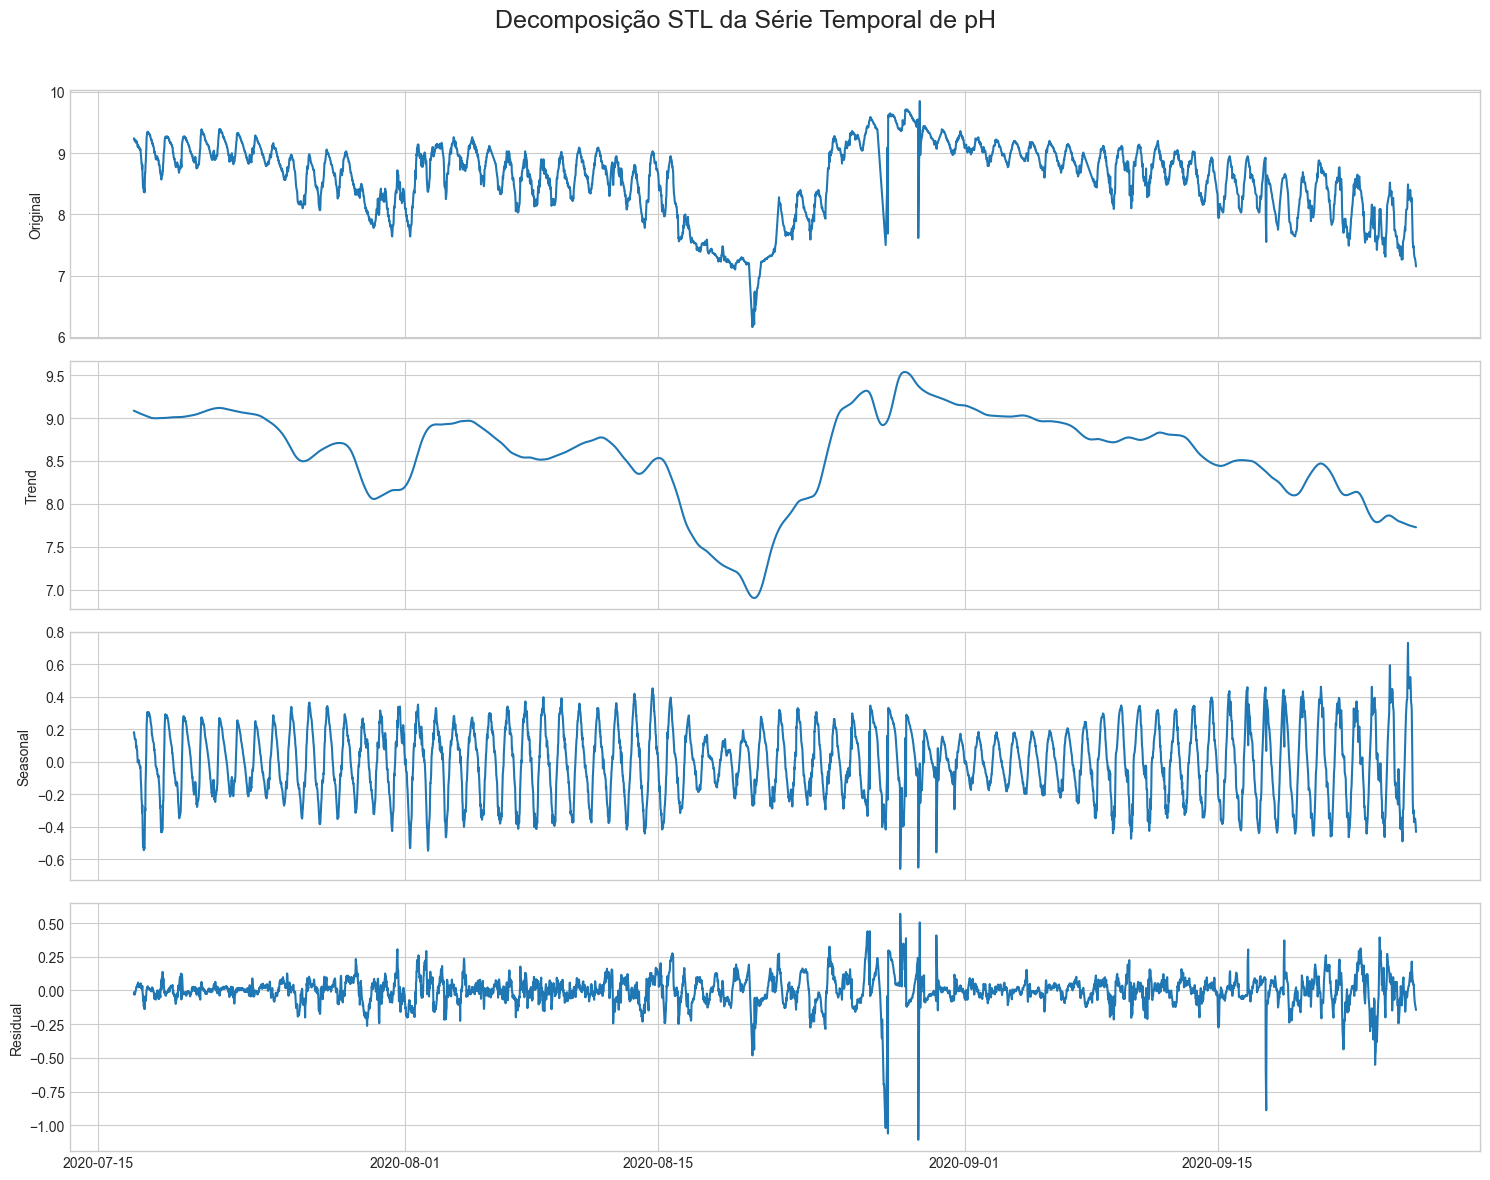

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from statsmodels.tsa.seasonal import STL

# --- Assumindo que o DataFrame 'df' já foi carregado ---

# --- Configuração de Caminhos ---
base_path = Path(r'D:\DOUTORADO\ARTIGO\01_EDA_Analise_Exploratoria')
output_dir = base_path / 'images'
output_dir.mkdir(parents=True, exist_ok=True)
figure_name = 'fig05_ph_stl_decomposition.png'
output_path = output_dir / figure_name

# --- Decomposição STL ---
# period=72 -> Nossos dados são a cada 20 minutos, então um ciclo diário tem 3*24 = 72 períodos.
stl = STL(df['ph'], period=72)
result = stl.fit()

# --- Criação do Gráfico de Decomposição ---
plt.style.use('seaborn-v0_8-whitegrid')
# Criamos uma figura com 4 subplots para cada componente
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotar cada componente
ax1.plot(df['ph'])
ax1.set_ylabel('Original')

ax2.plot(result.trend)
ax2.set_ylabel('Trend')

ax3.plot(result.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(result.resid)
ax4.set_ylabel('Residual')


# --- Formatação e Salvamento ---
fig.suptitle('Decomposição STL da Série Temporal de pH', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(output_path, dpi=300)

print(f"Gráfico de decomposição STL salvo com sucesso em: {output_path}")
plt.show()